In [2]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_Clients_Accounts = pd.read_excel("data/Analytics Showdown Data (Koolboks).xlsx",sheet_name="Clients_Accounts")
df_Payments = pd.read_excel("data/Analytics Showdown Data (Koolboks).xlsx",sheet_name="Payments")
#df_Pricing_Groups = pd.read_excel("data/Analytics Showdown Data (Koolboks).xlsx",sheet_name="Pricing_Groups")

# Feature EDA

In [3]:
df_Clients_Accounts.columns

Index(['account_qid', 'group_name', 'product', 'product_size', 'group_qid',
       'billing_model', 'currency', 'down_payment',
       'down_payment_days_included', 'minimum_payment', 'full_price',
       'payment_amount_per_period', 'payment_period_in_days',
       'nominal_term_days', 'registration_date', 'total_paid', 'status',
       'cumulative_days_disabled', 'latest_payment_date', 'days_to_cutoff',
       'payment_due_date', 'state', 'lga', 'geolocation', 'gender',
       'client_date_of_birth', 'occupation', 'business_type', 'business_size',
       'monthly_generated_income', 'lead_source', 'product_use'],
      dtype='object')

## billing_model

In [4]:
df_Clients_Accounts.groupby("billing_model")['billing_model'].count()

billing_model
Direct_Sale    1091
PAYG           1812
Name: billing_model, dtype: int64

In [5]:
df_Clients_PAYG = df_Clients_Accounts[df_Clients_Accounts['billing_model']=="PAYG"]

## cumulative_days_disabled

In [6]:
print("the number of 0 in cumulative_days_disabled: ", sum(df_Clients_PAYG.cumulative_days_disabled == 0) )
print("the number of non 0 in cumulative_days_disabled: ", sum(df_Clients_PAYG.cumulative_days_disabled != 0) )

the number of 0 in cumulative_days_disabled:  422
the number of non 0 in cumulative_days_disabled:  1390


(array([753., 281., 140.,  85.,  64.,  31.,  28.,   4.,   1.,   3.]),
 array([  1. ,  80.8, 160.6, 240.4, 320.2, 400. , 479.8, 559.6, 639.4,
        719.2, 799. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of Cumulative Days Disabled (Excluding Zeros)')

Text(0.5, 0, 'Cumulative Days Disabled')

Text(0, 0.5, 'Frequency')

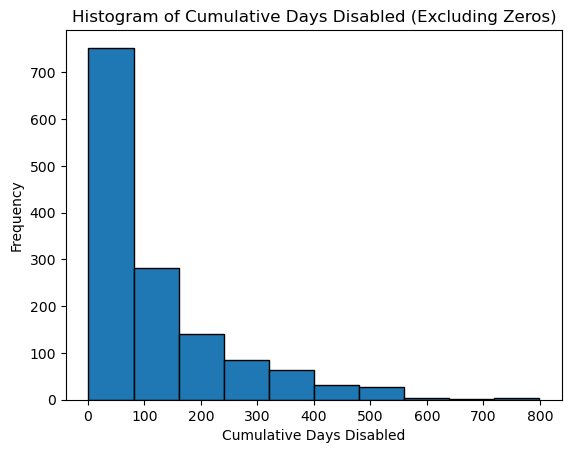

In [7]:
plt.hist(df_Clients_PAYG[df_Clients_PAYG['cumulative_days_disabled'] != 0]['cumulative_days_disabled'],
         bins=10, edgecolor='black')
# Adding titles and labels
plt.title('Histogram of Cumulative Days Disabled (Excluding Zeros)')
plt.xlabel('Cumulative Days Disabled')
plt.ylabel('Frequency')

## status

In [8]:
df_Clients_PAYG.groupby("status")['status'].count()

status
Disabled       299
Enabled        555
Repossessed    122
Unlocked       836
Name: status, dtype: int64

* disabled:	 Account status indicating that loan payments are overdue.

* enabled:	 Account status indicating that loan payments are current.

* unlocked:	 Account status indicating that loan is fully paid for

## status + cumulative_days_disabled

In [9]:
# Group by 'status' and count where 'cumulative_days_disabled' is 0
# Group by 'status' and perform multiple aggregations
df_Clients_PAYG.groupby('status').agg(
    total_count=('cumulative_days_disabled', 'count'),
    count_cumulative_days_disabled_0=('cumulative_days_disabled', lambda x: (x == 0).sum()),
    count_cumulative_days_disabled_not_0=('cumulative_days_disabled', lambda x: (x != 0).sum())
).reset_index()

,status,total_count,count_cumulative_days_disabled_0,count_cumulative_days_disabled_not_0
0,Disabled,299,0,299
1,Enabled,555,114,441
2,Repossessed,122,72,50
3,Unlocked,836,236,600


## down_payment_days_included

In [10]:
df_Clients_PAYG.groupby('down_payment_days_included')['down_payment_days_included'].count()

down_payment_days_included
0.0      597
5.0        1
6.0        1
10.0       5
15.0       1
20.0       3
23.0       1
25.0       3
26.0       1
28.0       1
29.0       1
30.0     972
34.0       1
36.0       1
40.0       1
43.0       1
50.0       2
55.0       1
57.0       2
60.0       6
64.0       1
70.0       1
75.0       2
80.0       1
90.0       2
101.0      1
107.0      1
109.0      1
120.0      4
140.0      1
150.0      1
176.0      1
180.0      1
350.0      1
Name: down_payment_days_included, dtype: int64

## payment_period_in_days

In [11]:
df_Clients_PAYG.groupby('payment_period_in_days')['payment_period_in_days'].count()

payment_period_in_days
7.0       58
14.0       6
30.0    1556
60.0       1
Name: payment_period_in_days, dtype: int64

## product

In [12]:
df_Clients_PAYG['product'].nunique()

21

In [13]:
df_Clients_PAYG.groupby("product")['product'].count()

product
108L Freezer - Legacy                      102
108L Freezer Non-PAYGO                      27
108L Non-PAYGO                              25
119L Non-PAYGO                               1
1280L Freezer - Legacy                       2
1280L Non-PAYGO                              2
158L Freezer - Legacy                       62
158L Non-PAYGO                              51
195L Icemaker Non-Paygo                     23
208L Freezer - Legacy                      208
208L Non-PAYGO                              70
538L Freezer - Legacy                      202
538L Freezer - Outright (2021-2022 Aug)      1
538L Non-PAYGO                              61
540L Freezer - Legacy Custom                 2
700L Freezer - Legacy                        1
Koolpaygo                                  572
Koolpaygo - Non PAYG                        30
Koolpaygo 158L                              84
Koolpaygo 208L                             148
Koolpaygo 538L                             138
Name:

## full_price

<Figure size 800x600 with 0 Axes>

(array([344., 703., 472., 179.,  56.,  52.,   4.,   0.,   1.,   1.]),
 array([ 105000. ,  543544.5,  982089. , 1420633.5, 1859178. , 2297722.5,
        2736267. , 3174811.5, 3613356. , 4051900.5, 4490445. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of Full Price')

Text(0.5, 0, 'Full Price')

Text(0, 0.5, 'Frequency')

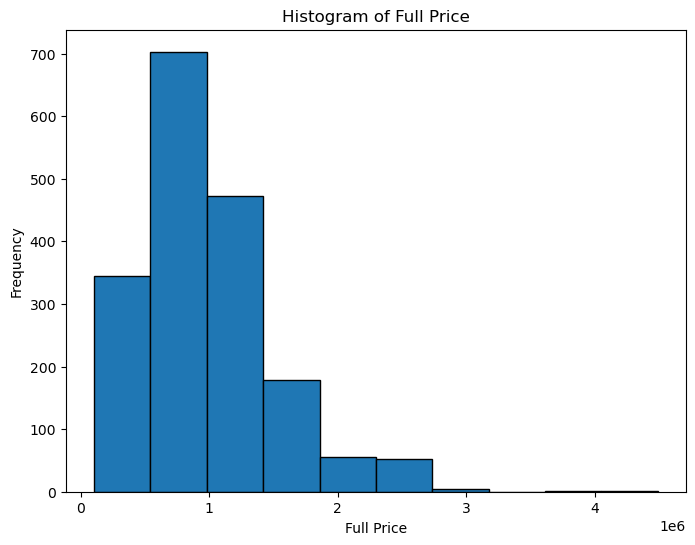

In [14]:
# Plotting a histogram of 'full_price'
plt.figure(figsize=(8, 6))
plt.hist(df_Clients_PAYG['full_price'], bins=10, edgecolor='black')
plt.title('Histogram of Full Price')
plt.xlabel('Full Price')
plt.ylabel('Frequency')
plt.show()

## registration_date

C:\Users\anson\AppData\Local\Temp\ipykernel_23132\3762986544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clients_PAYG["registration_date"] = pd.to_datetime(df_Clients_PAYG['registration_date'])


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 512 artists>

Text(0.5, 1.0, 'Frequency of registration_datee')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Frequency')

(array([18597., 18628., 18659., 18687., 18718., 18748., 18779., 18809.,
        18840., 18871., 18901., 18932., 18962., 18993., 19024., 19052.,
        19083., 19113., 19144., 19174., 19205., 19236., 19266., 19297.,
        19327., 19358., 19389., 19417., 19448., 19478., 19509., 19539.,
        19570., 19601., 19631., 19662., 19692., 19723., 19754., 19783.,
        19814., 19844.]),
 [Text(18597.0, 0, '12-2020'),
  Text(18628.0, 0, '01-2021'),
  Text(18659.0, 0, '02-2021'),
  Text(18687.0, 0, '03-2021'),
  Text(18718.0, 0, '04-2021'),
  Text(18748.0, 0, '05-2021'),
  Text(18779.0, 0, '06-2021'),
  Text(18809.0, 0, '07-2021'),
  Text(18840.0, 0, '08-2021'),
  Text(18871.0, 0, '09-2021'),
  Text(18901.0, 0, '10-2021'),
  Text(18932.0, 0, '11-2021'),
  Text(18962.0, 0, '12-2021'),
  Text(18993.0, 0, '01-2022'),
  Text(19024.0, 0, '02-2022'),
  Text(19052.0, 0, '03-2022'),
  Text(19083.0, 0, '04-2022'),
  Text(19113.0, 0, '05-2022'),
  Text(19144.0, 0, '06-2022'),
  Text(19174.0, 0, '07-20

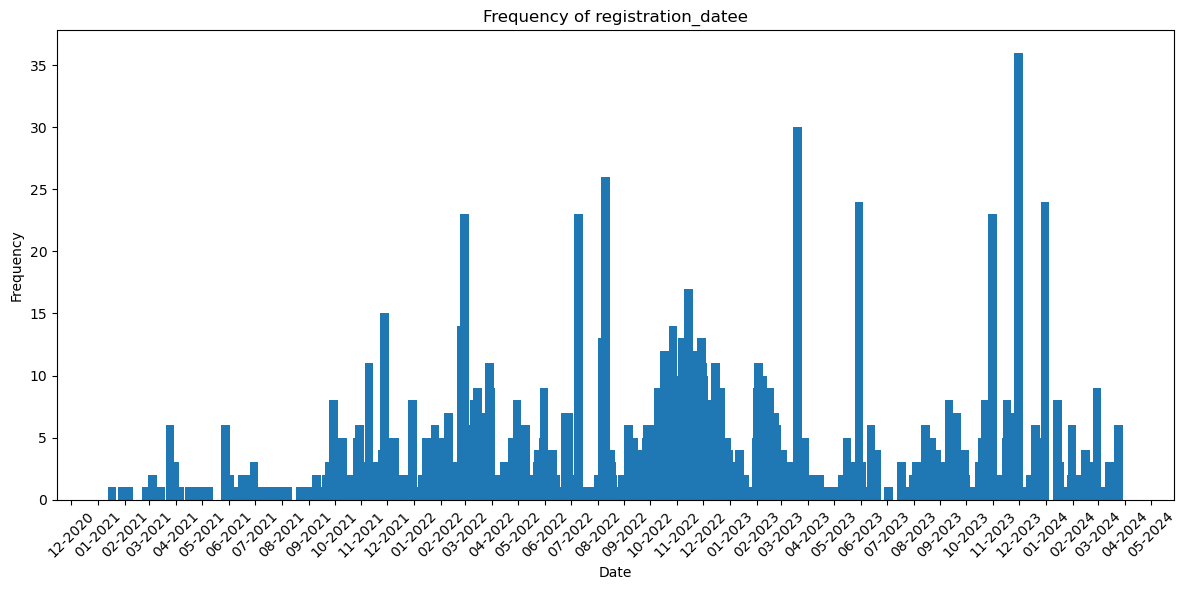

In [15]:
import matplotlib.dates as mdates

df_Clients_PAYG["registration_date"] = pd.to_datetime(df_Clients_PAYG['registration_date'])

frequency = df_Clients_PAYG.groupby('registration_date',as_index=False).size()

# Plotting the frequency over time
plt.figure(figsize=(12, 6))
plt.bar(frequency['registration_date'], frequency['size'], width=10)
# Format the x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

plt.title('Frequency of registration_datee')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## registration_date

C:\Users\anson\AppData\Local\Temp\ipykernel_23132\3762986544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clients_PAYG["registration_date"] = pd.to_datetime(df_Clients_PAYG['registration_date'])


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 512 artists>

Text(0.5, 1.0, 'Frequency of registration_datee')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Frequency')

(array([18597., 18628., 18659., 18687., 18718., 18748., 18779., 18809.,
        18840., 18871., 18901., 18932., 18962., 18993., 19024., 19052.,
        19083., 19113., 19144., 19174., 19205., 19236., 19266., 19297.,
        19327., 19358., 19389., 19417., 19448., 19478., 19509., 19539.,
        19570., 19601., 19631., 19662., 19692., 19723., 19754., 19783.,
        19814., 19844.]),
 [Text(18597.0, 0, '12-2020'),
  Text(18628.0, 0, '01-2021'),
  Text(18659.0, 0, '02-2021'),
  Text(18687.0, 0, '03-2021'),
  Text(18718.0, 0, '04-2021'),
  Text(18748.0, 0, '05-2021'),
  Text(18779.0, 0, '06-2021'),
  Text(18809.0, 0, '07-2021'),
  Text(18840.0, 0, '08-2021'),
  Text(18871.0, 0, '09-2021'),
  Text(18901.0, 0, '10-2021'),
  Text(18932.0, 0, '11-2021'),
  Text(18962.0, 0, '12-2021'),
  Text(18993.0, 0, '01-2022'),
  Text(19024.0, 0, '02-2022'),
  Text(19052.0, 0, '03-2022'),
  Text(19083.0, 0, '04-2022'),
  Text(19113.0, 0, '05-2022'),
  Text(19144.0, 0, '06-2022'),
  Text(19174.0, 0, '07-20

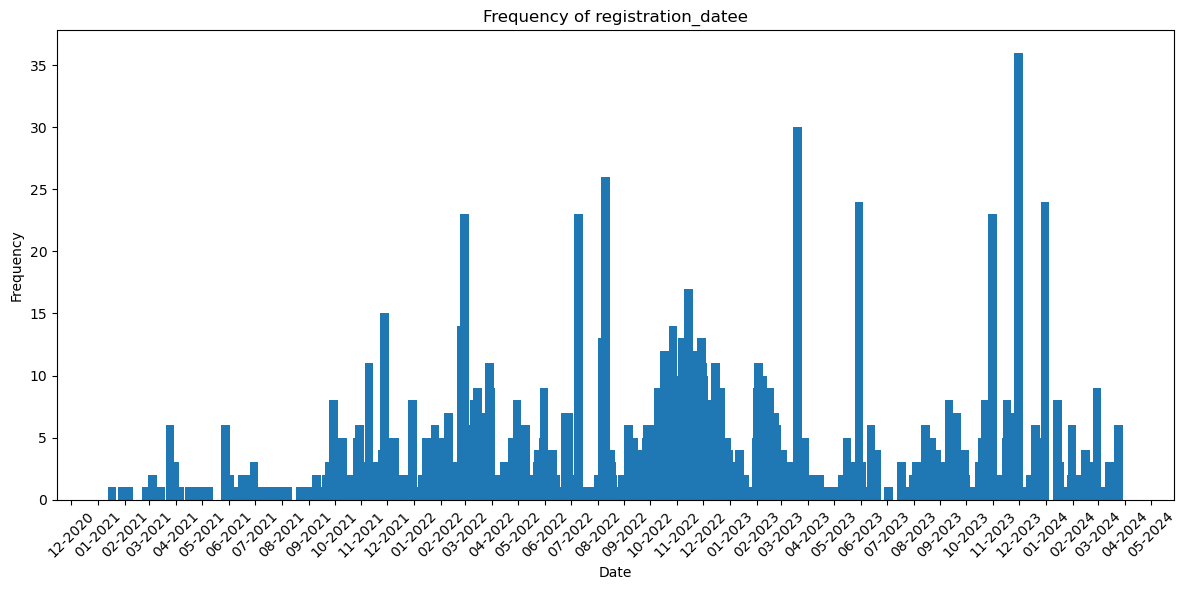

In [16]:
import matplotlib.dates as mdates

df_Clients_PAYG["registration_date"] = pd.to_datetime(df_Clients_PAYG['registration_date'])

frequency = df_Clients_PAYG.groupby('registration_date',as_index=False).size()

# Plotting the frequency over time
plt.figure(figsize=(12, 6))
plt.bar(frequency['registration_date'], frequency['size'], width=10)
# Format the x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

plt.title('Frequency of registration_datee')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## categorical

In [17]:
df_Clients_PAYG.groupby("state")["state"].count()

state
Abia                           1
Adamawa                        1
Akwa Ibom                      4
Anambra                        6
Bayelsa                        2
Cross River                    5
Delta                         22
Edo                           28
Ekiti                         23
Enugu                         11
Federal Capital Territory     11
Imo                            6
Kaduna                         2
Kano                          16
Kebbi                          1
Kogi                           5
Kwara                         82
Lagos                        451
Nasarawa                       4
Niger                          1
Not indicated                177
Ogun                         497
Ondo                         113
Osun                          34
Oyo                          286
Plateau                       14
Rivers                         6
Sokoto                         1
Zamfara                        1
Name: state, dtype: int64

In [18]:
df_Clients_PAYG.groupby("lga")["lga"].count()

lga
Aba North           1
Abaji               1
Abeokuta North     24
Abeokuta South     23
Abuja Municipal     6
                   ..
Yenegoa             1
Yewa North          2
Yewa South          4
Yola South          1
Zurmi               1
Name: lga, Length: 185, dtype: int64

In [19]:
df_Clients_PAYG.groupby("gender")["gender"].count()

gender
Female    1063
Male       646
Name: gender, dtype: int64

In [20]:
df_Clients_PAYG.groupby("occupation")["occupation"].count()

occupation
Administration               72
Artist, Entertainment         9
Construction                  9
Cook (Food Service)          82
Driver (Transportation)      12
Electricity, Gas             10
Farmer (Animals)             35
Farmer (Crops)               31
Furniture Production          4
Health and Social Work       48
Hotel (Accommodation)        15
Manufacturing                14
Merchant (Trade)            780
Mining and Quarrying          2
Repair of Motor Vehicles      5
Security, Guard               5
Teacher (Education)          40
Textile Production            5
Water Supply, Cleaning        7
police officer                1
Name: occupation, dtype: int64

In [21]:
df_Clients_PAYG.groupby("business_type")["business_type"].count()

business_type
Beverages Dealer      399
Civil Servant          62
Corperate Worker        1
Corporate Worker       59
Frozen Food Seller    445
Ice Block Seller      145
Others                273
Restaurants/Bar       149
Name: business_type, dtype: int64

In [22]:
df_Clients_PAYG.groupby("business_size")["business_size"].count()

business_size
Large      90
Medium    321
Small     148
Name: business_size, dtype: int64

In [23]:
df_Clients_PAYG.groupby("monthly_generated_income")["monthly_generated_income"].count()

monthly_generated_income
1,000,001 and Above      6
100,001 – 150,000      337
150,001 – 200,000      252
200,001 – 250,000      191
250,001 – 300,000      145
300,001 – 400,000      115
400,001 – 500,000      171
50,000 and Below         3
50,001 – 100,000       177
500,001 – 1,000,000     54
Name: monthly_generated_income, dtype: int64

In [24]:
df_Clients_PAYG.groupby("lead_source")["lead_source"].count()

lead_source
DSA                66
Email              20
Existing Client     5
Facebook Ads        7
Other              89
Referral           45
Web Chat            4
Website Visit       7
Name: lead_source, dtype: int64

In [25]:
df_Clients_PAYG.groupby("product_use")["product_use"].count()

product_use
Commercial    329
Domestic       73
Name: product_use, dtype: int64

C:\Users\anson\AppData\Local\Temp\ipykernel_23132\2868048758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clients_PAYG[['latitude', 'longitude']] = df_Clients_PAYG['geolocation'].str.split(',', expand=True)
C:\Users\anson\AppData\Local\Temp\ipykernel_23132\2868048758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clients_PAYG[['latitude', 'longitude']] = df_Clients_PAYG['geolocation'].str.split(',', expand=True)
C:\Users\anson\AppData\Local\Temp\ipykernel_23132\2868048758.py:5: SettingWith

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Geolocation Scatter Plot')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

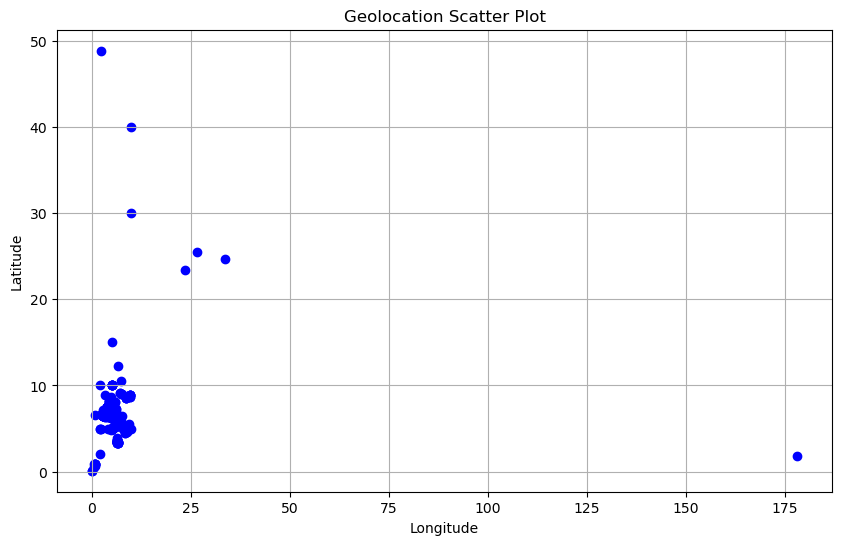

In [26]:
# Split 'geolocation' into 'latitude' and 'longitude'
df_Clients_PAYG[['latitude', 'longitude']] = df_Clients_PAYG['geolocation'].str.split(',', expand=True)

# Convert 'latitude' and 'longitude' to float
df_Clients_PAYG['latitude'] = pd.to_numeric(df_Clients_PAYG['latitude'])
df_Clients_PAYG['longitude'] = pd.to_numeric(df_Clients_PAYG['longitude'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(df_Clients_PAYG['longitude'], df_Clients_PAYG['latitude'], color='blue', marker='o')

plt.title('Geolocation Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

C:\Users\anson\AppData\Local\Temp\ipykernel_23132\1483661954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clients_PAYG['client_date_of_birth'] = pd.to_datetime(df_Clients_PAYG['client_date_of_birth'])
C:\Users\anson\AppData\Local\Temp\ipykernel_23132\1483661954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Clients_PAYG['age'] = current_date.year - df_Clients_PAYG['client_date_of_birth'].dt.year


<Figure size 800x600 with 0 Axes>

(array([ 25.,   1.,   0.,   0.,   0.,   1.,  14.,  29.,  72.,  78., 116.,
        122., 112., 106.,  47.,  66.,  34.,  15.,   8.,   4.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ,
        39.6, 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4, 72. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Freq')

Text(0.5, 1.0, 'Ages of Clients')

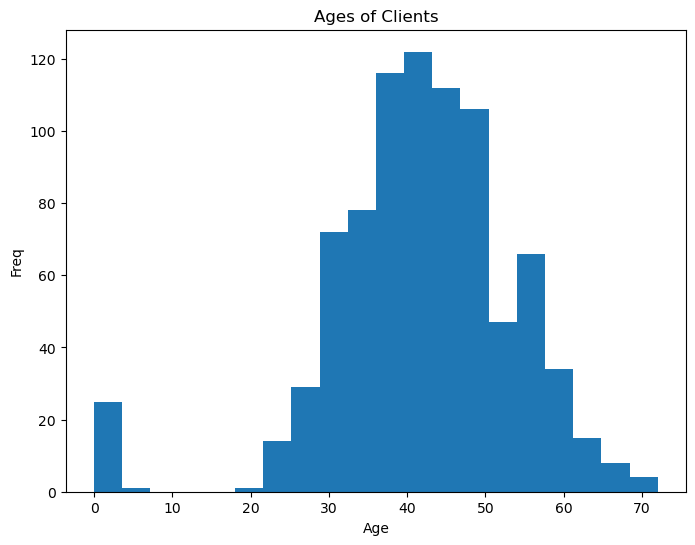

In [27]:
from datetime import datetime
# Convert dates of birth to datetime objects
df_Clients_PAYG['client_date_of_birth'] = pd.to_datetime(df_Clients_PAYG['client_date_of_birth'])

# Calculate ages
current_date = datetime.now()
df_Clients_PAYG['age'] = current_date.year - df_Clients_PAYG['client_date_of_birth'].dt.year

# Plot ages
plt.figure(figsize=(8, 6))
plt.hist(df_Clients_PAYG['age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Freq')
plt.title('Ages of Clients')
plt.show()

# Cluster

In [28]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [29]:
# Select only the numerical columns
X = df_Clients_PAYG.select_dtypes(include=['number']).copy()


c:\Users\anson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=0))])

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'PCA of Clusters')

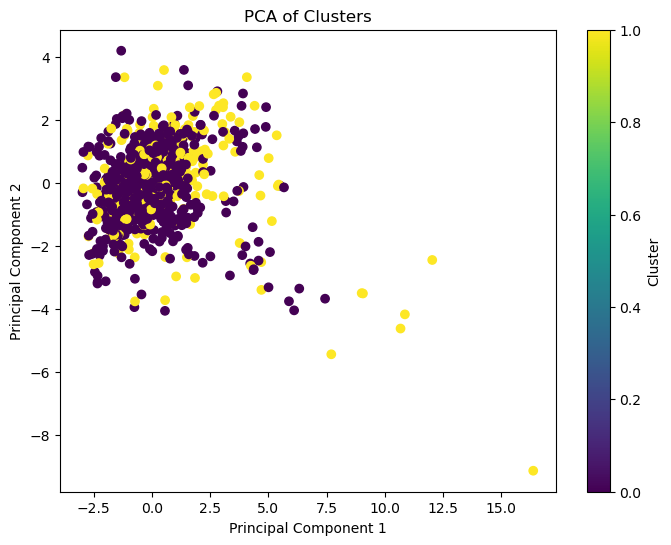

In [30]:
# Create a pipeline for imputation, scaling, and clustering
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Fill missing values with the mean
    StandardScaler(),                # Scale the data
    KMeans(n_clusters=2, random_state=0)  # Apply KMeans clustering
)

# Fit the pipeline to the data
pipeline.fit(X)

# Extract the KMeans model from the pipeline
kmeans = pipeline.named_steps['kmeans']

# Add cluster labels to the DataFrame
X['cluster'] = kmeans.labels_

# Create a separate pipeline for PCA with imputation and scaling
pca_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Fill missing values with the mean
    StandardScaler(),                # Scale the data
    PCA(n_components=2)              # Apply PCA
)

# Fit and transform the data using the PCA pipeline
pca_result = pca_pipeline.fit_transform(X.drop('cluster', axis=1))

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = X['cluster']

# Plot the PCA results with clusters in color
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()